In [31]:
import tensorflow as tf

In [32]:
print('Tensorflow Version: {}'.format(tf.__version__))

Tensorflow Version: 2.11.0


In [33]:
import pandas as pd
pd.__version__

'1.4.4'

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
data = pd.read_csv('test/Advertising.csv')

In [36]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


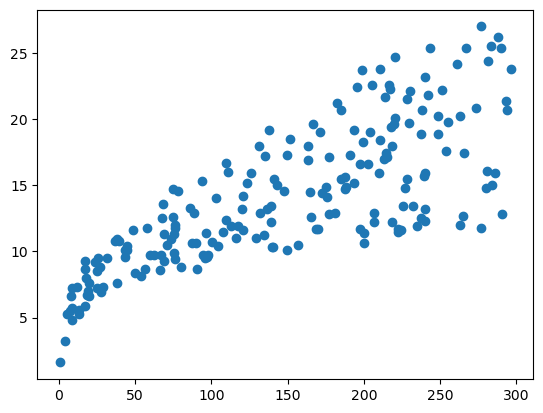

In [37]:
plt.scatter(data.TV, data.sales)

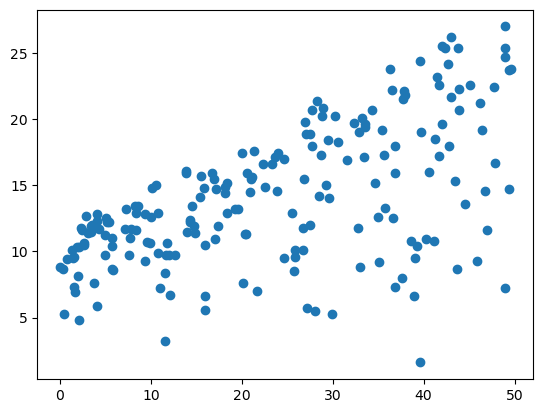

In [38]:
plt.scatter(data.radio, data.sales)

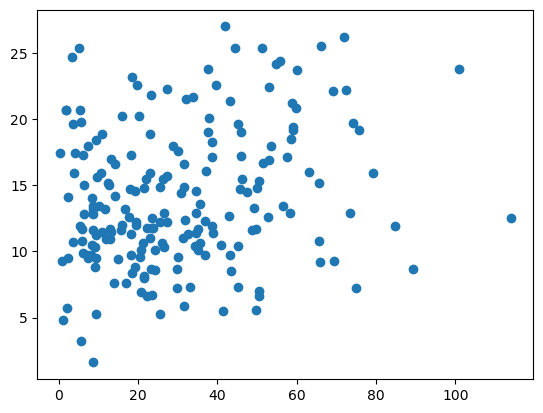

In [39]:
plt.scatter(data.newspaper, data.sales)

用iloc，取所有的行用[:],除去第一列和最后一列就是[:, 1:-1]

In [40]:
x = data.iloc[:, 1:-1]
y = data.iloc[:,-1]

Sequential-->建立一个顺序模型，Dense完成一个ax1+bx2+cx3的动作，也就是初始化一些a和这些变量相乘。
Dence第一个参数中间隐含层输出多少个单元，参数越大，拟合能力越强。然后添加一个激活函数
然后增加第二个输出层。

In [41]:
model = tf.keras.Sequential([tf.keras.layers.Dense(10, input_shape=(3,), activation='relu'),
                            tf.keras.layers.Dense(1)]
                           )

输出的第一个中间层是Dense层，包含10个隐藏单元，一共有40个参数（因为输出10个隐藏单元，有3个权重和一个偏置）。
10个隐藏单元，分别乘以权重再加上偏置

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                40        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


优化器仍选择adam，仍然使用均方差做输入和输出的损失（loss）

In [68]:
model.compile(optimizer = 'adam',
             loss = 'mse'
             )

训练200次

In [69]:
model.fit(x, y, epochs = 200)

Epoch 1/200
7/7 [==============================] - 0s 2ms/step - loss: 2.1918
Epoch 2/200
7/7 [==============================] - 0s 2ms/step - loss: 2.0722
Epoch 3/200
7/7 [==============================] - 0s 3ms/step - loss: 2.1699
Epoch 4/200
7/7 [==============================] - 0s 0s/step - loss: 2.2276
Epoch 5/200
7/7 [==============================] - 0s 1ms/step - loss: 2.0329
Epoch 6/200
7/7 [==============================] - 0s 1ms/step - loss: 2.0182
Epoch 7/200
7/7 [==============================] - 0s 1ms/step - loss: 2.0152
Epoch 8/200
7/7 [==============================] - 0s 2ms/step - loss: 2.0928
Epoch 9/200
7/7 [==============================] - 0s 0s/step - loss: 2.0138
Epoch 10/200
7/7 [==============================] - 0s 824us/step - loss: 1.9819
Epoch 11/200
7/7 [==============================] - 0s 725us/step - loss: 1.9344
Epoch 12/200
7/7 [==============================] - 0s 2ms/step - loss: 1.9309
Epoch 13/200
7/7 [==============================] - 0s 2ms/

7/7 [==============================] - 0s 3ms/step - loss: 1.3727
Epoch 105/200
7/7 [==============================] - 0s 0s/step - loss: 1.4204
Epoch 106/200
7/7 [==============================] - 0s 474us/step - loss: 1.3763
Epoch 107/200
7/7 [==============================] - 0s 2ms/step - loss: 1.3413
Epoch 108/200
7/7 [==============================] - 0s 0s/step - loss: 1.3334
Epoch 109/200
7/7 [==============================] - 0s 814us/step - loss: 1.3218
Epoch 110/200
7/7 [==============================] - 0s 2ms/step - loss: 1.3763
Epoch 111/200
7/7 [==============================] - 0s 0s/step - loss: 1.4259
Epoch 112/200
7/7 [==============================] - 0s 183us/step - loss: 1.5690
Epoch 113/200
7/7 [==============================] - 0s 3ms/step - loss: 1.6050
Epoch 114/200
7/7 [==============================] - 0s 3ms/step - loss: 1.4211
Epoch 115/200
7/7 [==============================] - 0s 0s/step - loss: 1.3229
Epoch 116/200
7/7 [==============================] -

对前10层进行预测

In [50]:
test = data.iloc[:10, 1:-1]

In [51]:
model.predict(test)

1/1 [==============================] - 0s 17ms/step


array([[21.134861 ],
       [ 9.948001 ],
       [ 7.8870134],
       [18.356281 ],
       [13.603431 ],
       [ 7.1978273],
       [12.172893 ],
       [11.688682 ],
       [ 2.2124162],
       [10.478335 ]], dtype=float32)

打印前10行的数据

In [88]:
test = data.iloc[:10, -1]

In [89]:
test

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64